In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt

0. Set Hyperparamters

In [2]:
train_ratio = 0.8 
validation_ratio = 0.2
epochs = 50
batch_size = 64

1. Import Data

In [472]:
# 1. Import data
NY_data = pd.read_csv("data/NY_data.csv")

# 2. Split data into x and y values
y = NY_data['price'].iloc[:5000]
X = NY_data.drop(columns=['price']).iloc[:5000]

# 4. Split data into Train vs. Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=42, shuffle=True)

In [473]:
DNN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, input_dim=X.shape[1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])


DNN.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())

2. Model Initilization

In [474]:
history = DNN.fit(X_train, y_train, epochs=epochs, verbose=1, batch_size=batch_size, validation_split=validation_ratio)

Epoch 1/50
50/50 [==============================] - 2s 17ms/step - loss: 5728552091648.0000 - val_loss: 6220752093184.0000
Epoch 2/50
50/50 [==============================] - 1s 15ms/step - loss: 5714579292160.0000 - val_loss: 6216004141056.0000
Epoch 3/50
50/50 [==============================] - 1s 15ms/step - loss: 5672417099776.0000 - val_loss: 6202877542400.0000
Epoch 4/50
50/50 [==============================] - 1s 15ms/step - loss: 5591734943744.0000 - val_loss: 6161194549248.0000
Epoch 5/50
50/50 [==============================] - 1s 15ms/step - loss: 5462590750720.0000 - val_loss: 6073257820160.0000
Epoch 6/50
50/50 [==============================] - 1s 15ms/step - loss: 5274360872960.0000 - val_loss: 5941619589120.0000
Epoch 7/50
50/50 [==============================] - 1s 15ms/step - loss: 5041812406272.0000 - val_loss: 5719222910976.0000
Epoch 8/50
50/50 [==============================] - 1s 15ms/step - loss: 4733416767488.0000 - val_loss: 5461497610240.0000
Epoch 9/50
50/50

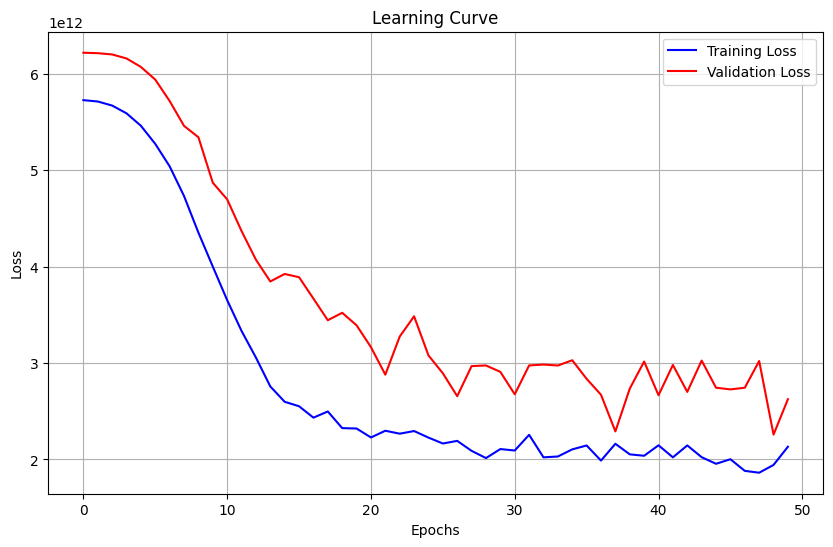

In [475]:
import matplotlib.pyplot as plt

# Extract the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [476]:
loss = DNN.evaluate(X_test, y_test)
print("Test Loss:", loss)

32/32 [==============================] - 0s 2ms/step - loss: 1476474830848.0000
Test Loss: 1476474830848.0


In [477]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = DNN.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

32/32 [==============================] - 0s 2ms/step
Mean Absolute Error: 507731.687722168
Mean Squared Error: 1476475010167.4524
Root Mean Squared Error: 1215102.880486855
R-squared: 0.6671887940053847


In [478]:
print(DNN.predict([[3.0,2.0,2.02,12521.0,1600.0]]))

1/1 [==============================] - 0s 70ms/step
[[366868.]]
